In [12]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Load the dataset
data = pd.read_csv('C:/Users/Admin/Desktop/XAI/healthcare-dataset-stroke-data.csv')

In [14]:
# Perform one-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [15]:
# Handling missing values - Replace NaN values in 'bmi' column with the mean
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [16]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['id', 'stroke'])
y = data['stroke']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Train a Random Forest Classifier (you can choose other classifiers as well)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9383561643835616
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [22]:
import matplotlib.pyplot as plt

In [23]:
feature_importance = clf.feature_importances_
feature_names = X.columns

In [24]:
# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]


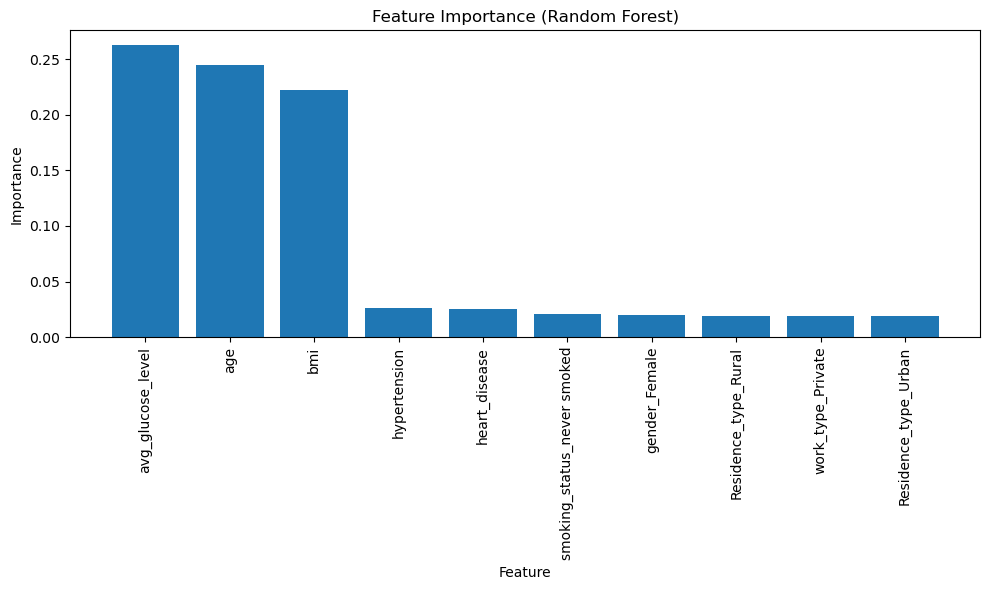

In [25]:
# Plot the top N most important features
top_n = 10  # You can change this number to show more or fewer features
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importance[sorted_idx[:top_n]], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx[:top_n]], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [26]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [27]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(clf)

In [28]:
# Calculate SHAP values for a sample of data (e.g., X_test)
shap_values = explainer.shap_values(X_test)

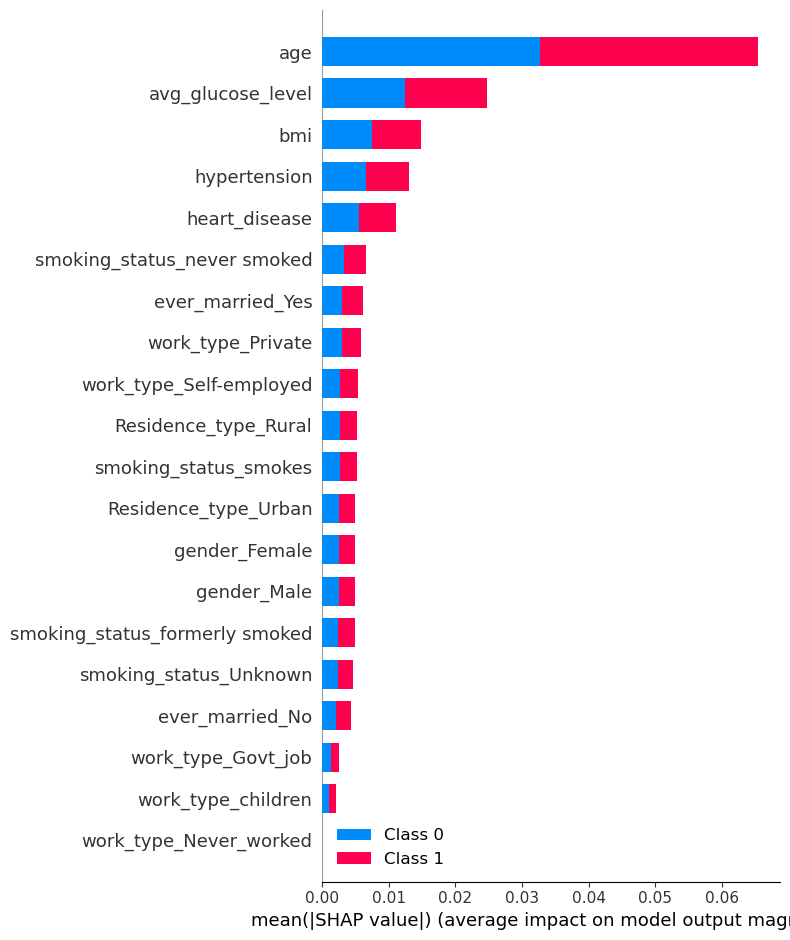

In [29]:
# Summary plot to visualize feature importance based on SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

In [20]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(clf)

In [30]:
# Select a specific data point (e.g., the first data point) from your test set
sample_data = X_test[0]  # Access the first row directly

In [31]:
# Calculate SHAP values for the selected data point
shap_values_sample = explainer.shap_values(sample_data)

In [32]:
# Generate a SHAP force plot for the selected data point
shap.initjs()  # Initialize the JavaScript visualization

In [33]:
shap.force_plot(explainer.expected_value[1], shap_values_sample[1], sample_data, feature_names=X.columns)

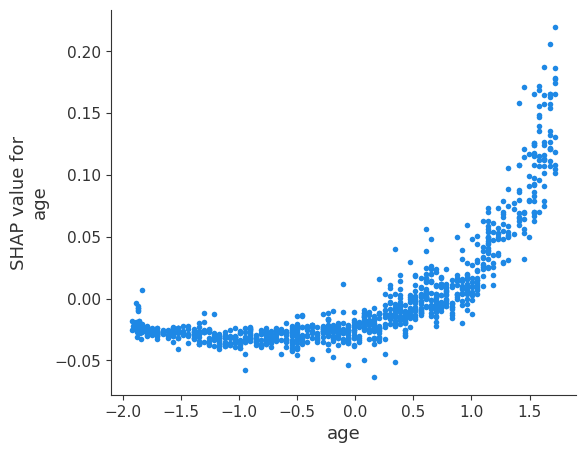

In [34]:
# Create a SHAP dependence plot for the 'age' feature
shap.dependence_plot("age", shap_values[1], X_test, feature_names=X.columns, interaction_index=None, show=False)

In [35]:
import lime
import lime.lime_tabular

In [36]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Your training data
    mode="classification",  # Use "classification" for classification models
    training_labels=y_train,  # Your training labels
    feature_names=list(X.columns),  # List of feature names
    discretize_continuous=True  # Set to True if your data contains continuous features
)


In [37]:
# Select a specific data point (e.g., the first data point) from your test set
sample_data = X_test[0]

In [38]:
# Explain the model's prediction for the selected data point
explanation = explainer.explain_instance(
    data_row=sample_data,
    predict_fn=clf.predict_proba,  # Your model's predict_proba function
    num_features=len(X.columns)  # Number of features in your dataset
)

In [39]:
# Plot the explanation with feature names
explanation.show_in_notebook()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


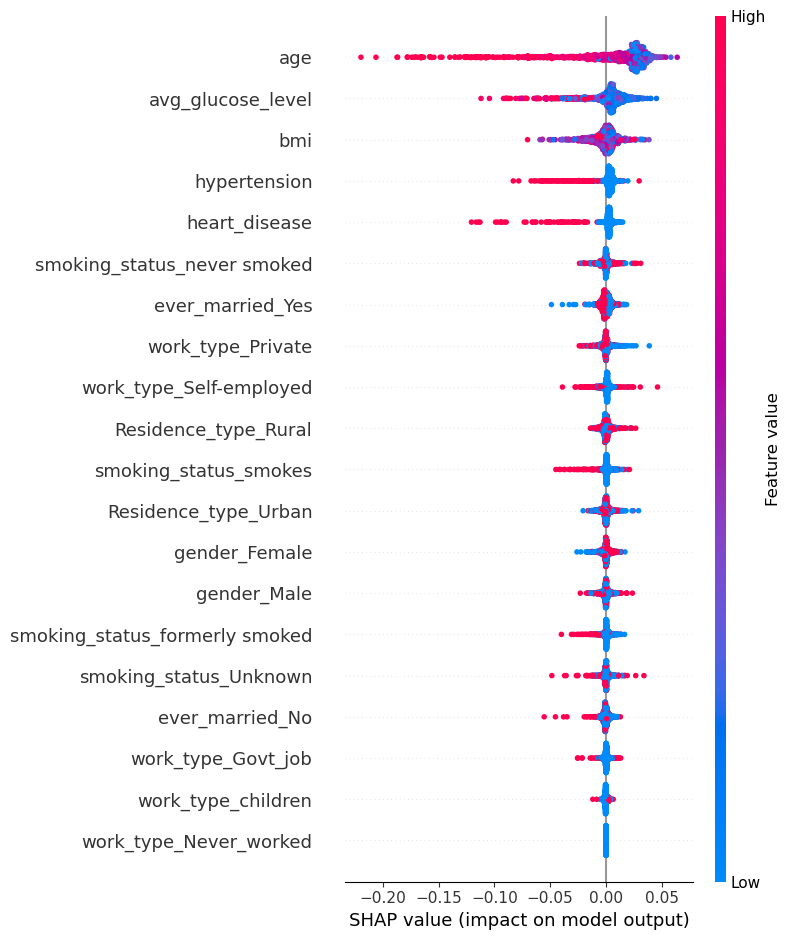

In [47]:
# Create summary plots for other classes (e.g., class 0)
shap.summary_plot(shap_values[0], X_test, feature_names=X.columns, show=False)


In [51]:
pip install eli5



  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [52]:
import eli5
from eli5.sklearn import PermutationImportance

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)